![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (100+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp" target="_blank">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use <a href="https://site.financialmodelingprep.com/contact" target="_blank">their contact form</a> or provide the data yourself. 

The current Notebook is revolved around the Risk class. If you are interested in the other modules, you can find the related Notebooks below. **Find the documentation <a href="https://www.jeroenbouma.com/projects/financetoolkit/docs/risk" target="_blank">here</a> which includes an explanation about the risk metrics, the parameters and an example.**

<style>
.button {
  color: #fff !important;
  background-color: #58abc4;
  display: inline-block;
  margin-bottom: 0.25em;
  padding: 0.5em 1em;
  font-family: -apple-system,BlinkMacSystemFont,"Roboto","Segoe UI","Helvetica Neue","Lucida Grande",Arial,sans-serif;
  font-size: .75em;
  font-weight: bold;
  text-align: center;
  text-decoration: none;
  border-width: 0;
  border-radius: 4px;
  cursor: pointer;
}

.button-current {
  background-color: #d67f05;
}

a:hover {
  color: #fff !important;
  font-weight: normal !important;
}
</style>

<div style="display: flex; justify-content: space-between;" class="show-on-desktop">
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//getting-started" target="_blank" class="button" style="flex: 1;margin-right:5px"">Toolkit</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//discovery-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Discovery</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//ratios-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Ratios</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//models-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Models</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//options-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Options</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//technicals-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Technicals</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//risk-module" target="_blank" class="button button-current" style="flex: 1;margin-right:5px">Risk</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//performance-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Performance</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//economics-module"  target="_blank" class="button" style="flex: 1;margin-right:5px">Economics</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//fixed-income-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Fixed income</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//portfolio-module" target="_blank" class="button" style="flex: 1; ">Portfolio</a>
</div>

In [ ]:
import pandas as pd

from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_API_KEY"

The Risk module is meant to calculate important risk metrics such as Value at Risk (VaR), Conditional Value at Risk (cVaR), Maximum Drawdown, Correlations, Beta, GARCH, EWMA and more.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["MSFT", "AAPL", "AMZN", "META"], api_key=API_KEY, start_date="2013-01-01"
)

An important measurement is that of Value at Risk (VaR) and Conditional Value at Risk (cVaR) in which the former is the maximum loss that can be expected with a certain probability (e.g. 95%) and the latter is the expected loss given that the loss is greater than the VaR. Understanding the potential tail risk you take is crucial for any investment.

By default, you will acquire the `yearly` or `quarterly` results (if `quarterly=True`) but you als have the option to obtain the `monthly` and `weekly` results.

In [3]:
companies.risk.get_conditional_value_at_risk(period="monthly")

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  9.44it/s]


,MSFT,AAPL,AMZN,META,Benchmark
2012-01,-0.0132,-0.0171,-0.0262,0.0,-0.0052
2012-02,-0.0091,-0.0228,-0.0772,0.0,-0.0073
2012-03,-0.0112,-0.0197,-0.0188,0.0,-0.011
2012-04,-0.0225,-0.0412,-0.0281,0.0,-0.0167
2012-05,-0.0232,-0.0289,-0.0256,-0.1031,-0.0155
...,...,...,...,...,...
2024-12,-0.0274,-0.016,-0.0302,-0.0266,-0.0206
2025-01,-0.0618,-0.0404,-0.0242,-0.0231,-0.0153
2025-02,-0.019,-0.0339,-0.0405,-0.0276,-0.0171
2025-03,-0.0318,-0.0411,-0.0398,-0.0455,-0.0234


These parameters also have the ability to show (lagged) growth e.g. for the Ulcer Index, which is a financial metric used to assess the risk and volatility of an investment portfolio or asset, it is possible to show the growth over time on a yearly basis.

In [4]:
companies.risk.get_ulcer_index(period="yearly", growth=True)

,MSFT,AAPL,AMZN,META,Benchmark
2012,NaN,NaN,NaN,NaN,NaN
2013,0.0676,-0.0133,-0.1491,-0.4483,-0.3263
2014,-0.3727,-0.3962,0.8827,-0.1939,0.2477
2015,0.6647,0.452,-0.586,-0.2926,0.3655
2016,-0.154,-0.0325,0.9,0.1593,-0.3743
2017,-0.5512,-0.4475,-0.5344,-0.5501,-0.5621
2018,1.383,1.5583,1.5634,3.0836,4.4937
2019,-0.4889,-0.4425,-0.3972,-0.483,-0.5566
2020,2.0626,0.9954,0.4374,0.9328,2.7899
2021,-0.5615,-0.4437,-0.2039,-0.4202,-0.774


With these functions, it becomes relatively easy to understand the returns of each asset as opposed to the risk taken by looking at the Maximum Drawdown.

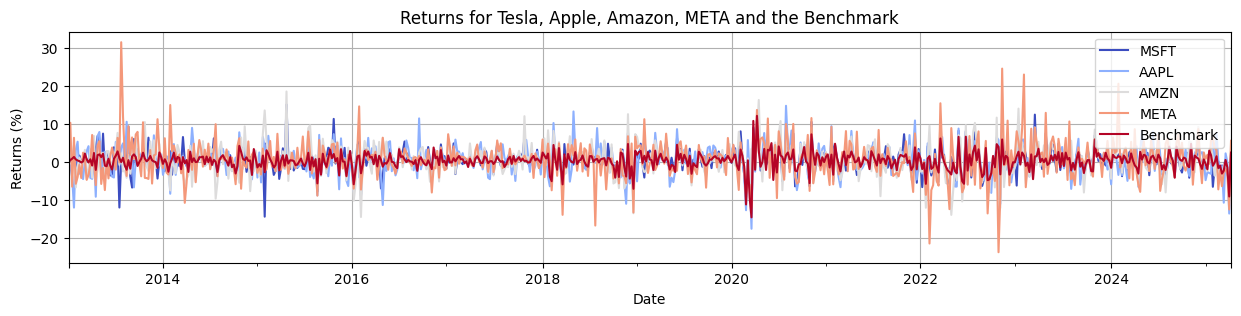

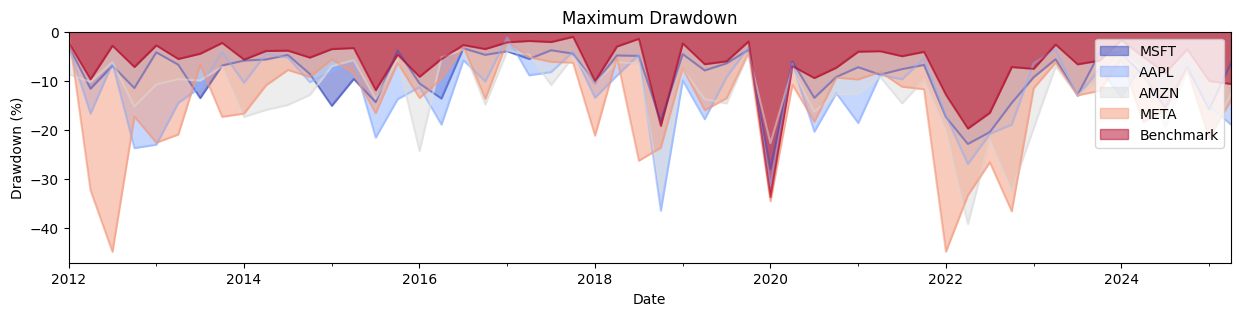

In [5]:
import matplotlib.pyplot as plt

(companies.get_historical_data(period="weekly")["Return"] * 100).plot(
    figsize=(15, 3),
    title="Returns for Tesla, Apple, Amazon, META and the Benchmark",
    grid=True,
    xlabel="Date",
    ylabel="Returns (%)",
    colormap="coolwarm",
)

plt.legend(loc="upper right")

(companies.risk.get_maximum_drawdown(period="quarterly") * 100).plot.area(
    stacked=False,
    figsize=(15, 3),
    title="Maximum Drawdown",
    xlabel="Date",
    ylabel="Drawdown (%)",
    colormap="coolwarm",
)

plt.legend(loc="upper right")

Using the individual models with your own DataFrames is also a possibility thanks to the architecture of the Finance Toolkit.

In [6]:
import random

from financetoolkit.risk import evar_model, risk_model, var_model

random_seeds = {
    "Stock A": random.seed(1),
    "Stock B": random.seed(2),
    "Stock C": random.seed(3),
    "Stock D": random.seed(4),
    "Stock E": random.seed(5),
    "Stock F": random.seed(6),
}

return_statistics = {}


for stock_name, random_seed in random_seeds.items():  # noqa
    returns = pd.Series([random.randint(-15, 15) / 100 for _ in range(1, 100)])  # noqa

    return_statistics[stock_name] = {}

    return_statistics[stock_name]["Standard Deviation"] = returns.std()

    return_statistics[stock_name]["Skewness"] = risk_model.get_skewness(returns=returns)

    return_statistics[stock_name]["Kurtosis"] = risk_model.get_kurtosis(returns=returns)

    return_statistics[stock_name]["Max Drawdown"] = risk_model.get_max_drawdown(
        returns=returns
    )

    return_statistics[stock_name]["Value at Risk"] = var_model.get_var_historic(
        returns=returns, alpha=0.05
    )

    return_statistics[stock_name]["Expected Shortfall"] = evar_model.get_evar_gaussian(
        returns=returns, alpha=0.05
    )

pd.DataFrame(return_statistics)

,Stock A,Stock B,Stock C,Stock D,Stock E,Stock F
Standard Deviation,0.08821543222113962,0.08413087741814766,0.08662407973217075,0.0937286222448179,0.08625921059272446,0.09432549775045428
Skewness,-0.3027062148307057,0.05053140281362072,-0.061004708480634655,-0.1173908260471284,-0.010269303664839977,-0.12665217622676592
Kurtosis,-1.089305114933322,-1.0633743930125537,-0.9906912081025396,-1.2386237675714218,-1.2906619347822095,-1.3038603094677401
Max Drawdown,-0.42830428606449333,-0.6452670082787249,-0.5948222590782846,-0.6028630535289301,-0.8447802941456009,-0.7132807101295089
Value at Risk,-0.131,-0.131,-0.14,-0.14,-0.14,-0.15
Expected Shortfall,0.20704554551247,0.1819924153028384,0.19315171502743306,0.21121319832341942,0.17614782872226595,0.20334420604231015
